# 机器学习与数据挖掘  实验七--掌握各类聚类算法
1、	下载你最感兴趣的数据集进行实验，禁止使用之前使用过的数据集。

2、	请先对你下载的数据集进行简单描述，包括：其数据集的定义以及所使用特征的描述（为了降低难度，可以只选择部分特征进行聚类）。

3、	请任选三种聚类算法对该数据进行分析，并给出你的聚类结果。

4、	对三种算法的性能（所花时间）与聚类效果（可以选择多个评判指标）进行对比。


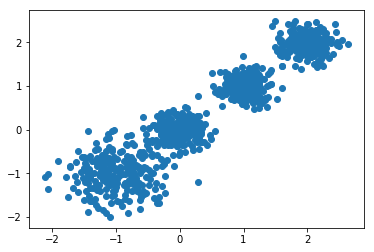

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2，0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.2, 0.2, 0.2], 
                  random_state =9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

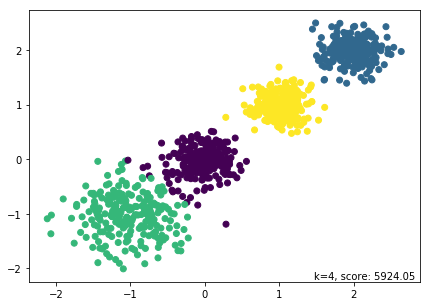

训练总体时间： 
0:00:00.181834


In [54]:
import datetime
start = datetime.datetime.now()
from sklearn.cluster import KMeans
plt.figure(figsize=(7, 5))
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
score= metrics.calinski_harabaz_score(X, y_pred)  
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.text(.99, .01, ('k=4, score: %.2f' % (score)),
    transform=plt.gca().transAxes, size=10,
    horizontalalignment='right')
plt.show()
end = datetime.datetime.now()
print("训练总体时间： ")
print(end - start)

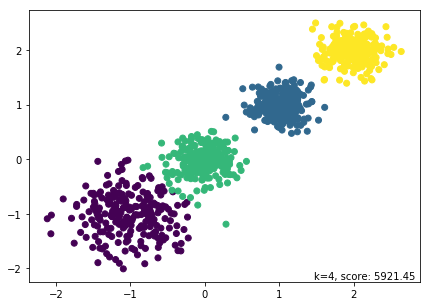

训练总体时间： 
0:00:00.172458


In [55]:
import datetime
start = datetime.datetime.now()
from sklearn.cluster import MiniBatchKMeans
plt.figure(figsize=(7, 5))
y_pred = MiniBatchKMeans(n_clusters=4, batch_size = 200, random_state=9).fit_predict(X)
score= metrics.calinski_harabaz_score(X, y_pred)  
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.text(.99, .01, ('k=4, score: %.2f' % (score)),
    transform=plt.gca().transAxes, size=10,
    horizontalalignment='right')
plt.show()
end = datetime.datetime.now()
print("训练总体时间： ")
print(end - start)

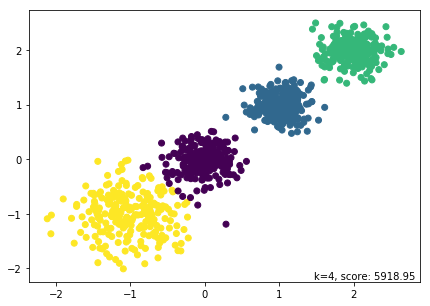

训练总体时间： 
0:00:00.275183


In [56]:
import datetime
start = datetime.datetime.now()
from sklearn.cluster import MeanShift, estimate_bandwidth
plt.figure(figsize=(7, 5))
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
y_pred = ms.fit_predict(X)
score= metrics.calinski_harabaz_score(X, y_pred)  
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.text(.99, .01, ('k=4, score: %.2f' % (score)),transform=plt.gca().transAxes, size=10,horizontalalignment='right')
plt.show()
end = datetime.datetime.now()
print("训练总体时间： ")
print(end - start)

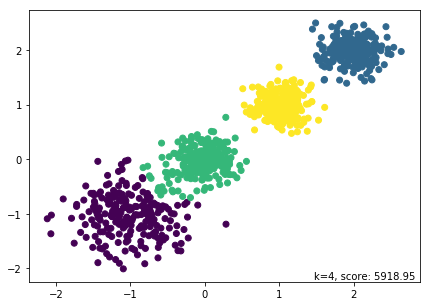

训练总体时间： 
0:00:00.215452


In [57]:
import datetime
start = datetime.datetime.now()
from sklearn.cluster import Birch
plt.figure(figsize=(7, 5))
y_pred = DBSCAN().fit(X)
y_pred = Birch(n_clusters = 4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.text(.99, .01, ('k=4, score: %.2f' % (score)),transform=plt.gca().transAxes, size=10,horizontalalignment='right')
plt.show()
end = datetime.datetime.now()
print("训练总体时间： ")
print(end - start)

KMeans------------------18.02------------------5924.5

MiniBatchKMeans-------17.21------------------5921.45

MeanShift---------------26.76------------------5918.95

Birch--------------------19.88------------------5918.95

